In [2]:
import pandas
import matplotlib

In [45]:
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

In [22]:
dataset = pandas.read_csv('donnees-hospitalieres-nouveaux-covid19-2020-09-24-19h00.csv', sep=";")

In [23]:
print(dataset)

       dep        jour  incid_hosp  incid_rea  incid_dc  incid_rad
0       01  2020-03-19           1          0         0          0
1       01  2020-03-20           0          0         0          1
2       01  2020-03-21           3          0         0          0
3       01  2020-03-22           3          1         0          1
4       01  2020-03-23          14          1         0          5
5       01  2020-03-24          11          1         0          4
6       01  2020-03-25          13          2         0          5
7       01  2020-03-26          14          3         2          2
8       01  2020-03-27          14          2         0          0
9       01  2020-03-28           7          3         1          3
10      01  2020-03-29          11          3         3          3
11      01  2020-03-30          20          7         4          1
12      01  2020-03-31          20          0         1          9
13      01  2020-04-01          38         14         2       

On cherche à voir dans quel département il y a eut le plus d'hospitalisations

In [53]:
tableauhospdep = dataset.groupby(dataset.dep).incid_hosp.sum().sort_values( ascending=False)

In [54]:
tableauhospdep

dep
75     10135
92      7195
94      7063
93      6452
13      6317
69      5430
68      4341
95      4174
59      4138
77      4013
91      3973
57      3739
67      3722
78      3648
62      2223
54      1898
973     1852
60      1842
33      1809
02      1597
42      1582
51      1509
06      1506
21      1403
83      1320
76      1285
71      1258
38      1219
34      1190
74      1160
       ...  
22       325
03       313
36       295
29       288
50       279
2A       278
19       251
86       231
87       227
65       218
12       217
46       204
24       203
81       196
2B       192
04       188
43       186
972      174
05       173
32       168
58       151
47       141
79       128
23       124
16       119
40       115
15        93
82        82
09        55
48        35
Name: incid_hosp, Length: 101, dtype: int64

On essaye de trouver le jour ou il y a eut le plus de morts.

In [44]:
dataset.loc[dataset.incid_dc.idxmax()]

dep                   91
jour          2020-09-18
incid_hosp           267
incid_rea              4
incid_dc              76
incid_rad            194
Name: 17093, dtype: object

On regarde quel département a eut le plus de décés.

In [56]:
dataset.groupby(dataset.dep).incid_dc.sum().sort_values( ascending=False)

dep
75     1877
94     1295
92     1165
93     1075
68      893
57      892
95      781
77      736
69      730
67      720
59      716
91      652
13      646
78      573
60      435
54      390
62      359
51      288
02      288
42      265
88      264
21      256
80      238
06      219
71      208
90      204
76      193
33      189
44      177
74      176
       ... 
03       44
22       43
19       42
86       40
66       40
64       35
87       31
976      29
46       29
32       28
58       28
65       27
12       26
81       23
16       22
79       22
972      20
05       20
43       19
23       17
974      16
2B       15
04       15
47       14
24       14
40       14
15       13
82        7
09        3
48        1
Name: incid_dc, Length: 101, dtype: int64

On fait un tableau pivot qui nous montre les entrées en réanimations par rapport aux départements et aux jours.

In [64]:
total_rea=dataset.pivot_table('incid_rea',index="jour",columns='dep',aggfunc=sum)
total_rea

dep,01,02,03,04,05,06,07,08,09,10,...,91,92,93,94,95,971,972,973,974,976
jour,,,,,,,,,,,,,,,,,,,,,
2020-03-19,0,8,0,0,0,4,1,1,0,1,...,14,19,30,17,8,0,0,0,0,0
2020-03-20,0,3,0,0,0,3,0,0,0,0,...,6,14,6,14,12,0,0,0,0,0
2020-03-21,0,4,0,0,0,0,0,0,0,2,...,8,17,10,6,10,0,0,0,0,0
2020-03-22,1,1,0,0,0,1,0,0,0,0,...,18,25,9,18,12,5,1,0,0,0
2020-03-23,1,1,0,0,3,5,0,1,2,0,...,22,22,16,24,15,0,0,0,0,0
2020-03-24,1,4,0,0,1,1,2,0,0,0,...,8,40,23,30,23,0,2,0,1,0
2020-03-25,2,5,0,0,0,5,1,1,0,5,...,16,37,10,36,16,0,2,0,0,0
2020-03-26,3,4,1,0,2,1,1,4,0,2,...,19,48,21,15,9,3,4,0,0,0
2020-03-27,2,3,1,0,1,4,2,1,0,0,...,11,30,18,12,13,7,3,0,0,0


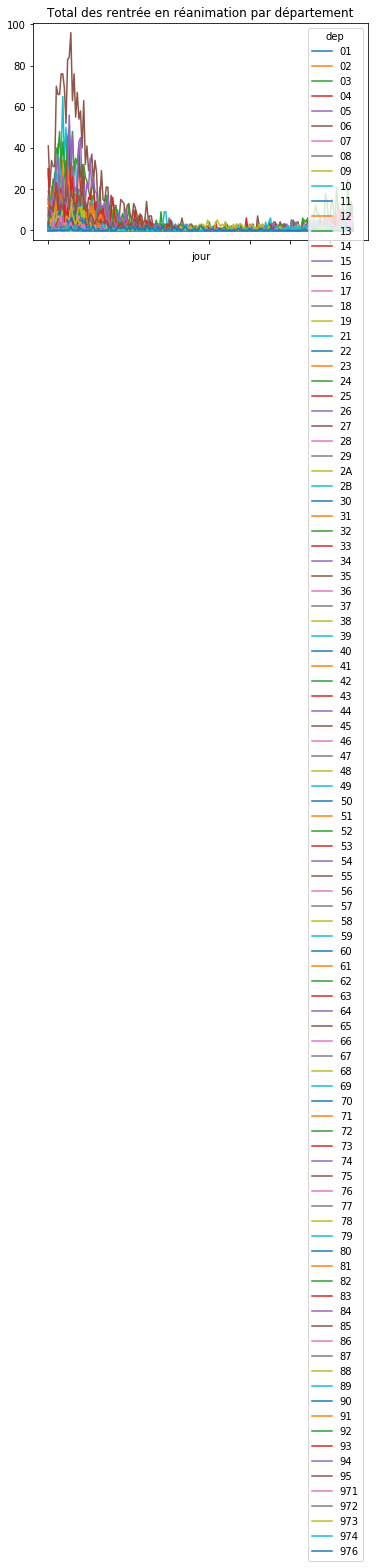

In [66]:
total_rea.plot(title="Total des rentrée en réanimation par département")

Camembert du nombre d'hospitalisation par département

([<matplotlib.patches.Wedge at 0x24f3c934748>,
 [Text(1.0672231895445685, 0.26652328922313356, ''),
  Text(0.866831257809947, 0.6772027543384812, ''),
  Text(0.5873887591335456, 0.9300400236783112, ''),
  Text(0.25823018329353414, 1.069260105136345, ''),
  Text(-0.07843640457939825, 1.0971999500713883, ''),
  Text(-0.3823708505208044, 1.0314031862816777, ''),
  Text(-0.612875044360007, 0.9134463202622909, ''),
  Text(-0.7864600905795478, 0.7690777112396441, ''),
  Text(-0.9239991506755265, 0.5968463533866198, ''),
  Text(-1.0228749682457083, 0.40463168355473783, ''),
  Text(-1.0814608598221063, 0.20110298026839643, ''),
  Text(-1.0999969199354922, -0.0026031005417874254, ''),
  Text(-1.0817269654199153, -0.19966665290784455, ''),
  Text(-1.0292964670275524, -0.3880061635652186, ''),
  Text(-0.9641481220234401, -0.5295454643358527, ''),
  Text(-0.9067705202362244, -0.622709582093071, ''),
  Text(-0.8467455000975349, -0.702155294834822, ''),
  Text(-0.7808307400571636, -0.774792459554029

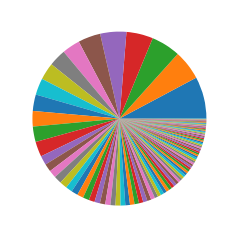

In [68]:
plt.pie(tableauhospdep)

In [70]:
nombremort = dataset.groupby(dataset.jour).incid_dc.sum().sort_values( ascending=False)
nombremort

jour
2020-04-06    613
2020-04-07    607
2020-04-03    606
2020-04-10    578
2020-04-08    562
2020-04-14    559
2020-03-31    526
2020-04-15    524
2020-04-02    524
2020-04-01    516
2020-04-20    450
2020-04-04    448
2020-04-16    435
2020-04-17    428
2020-04-09    424
2020-03-30    423
2020-04-21    404
2020-04-18    368
2020-04-05    361
2020-04-11    353
2020-04-22    349
2020-04-13    343
2020-04-28    328
2020-03-28    326
2020-04-23    320
2020-03-26    318
2020-04-12    315
2020-04-24    312
2020-03-27    307
2020-04-27    300
             ... 
2020-09-05     12
2020-08-07     12
2020-07-31     11
2020-08-04     11
2020-07-27      9
2020-06-14      9
2020-08-05      9
2020-07-18      8
2020-07-25      8
2020-06-21      7
2020-08-06      7
2020-07-22      7
2020-08-01      6
2020-09-13      6
2020-07-14      6
2020-08-29      6
2020-07-11      6
2020-08-15      4
2020-08-30      4
2020-09-06      3
2020-08-08      2
2020-06-28      2
2020-07-05      2
2020-08-23      1
2020-

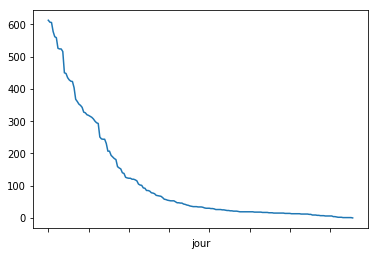

In [71]:
nombremort.plot()